<a href="https://colab.research.google.com/github/anindo78/Statistical-Programming-with-Colab-Notebooks/blob/main/Regression_Linear_and_Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Use Case: Predicting Revenue from Ad Spend**


Scenario:
You work for an ads analytics team at a large tech company like Google. Your task is to build a model that predicts the daily revenue generated from various types of ad spend (e.g., search ads, display ads, video ads). The business wants to understand the return on investment from each ad channel.

🧪 Features (Independent Variables):
search_spend: daily spend on search ads (in USD)

display_spend: daily spend on display ads (in USD)

video_spend: daily spend on video ads (in USD)

day_of_week: numeric value from 0 (Monday) to 6 (Sunday)

is_weekend: binary flag, 1 if Saturday or Sunday

🎯 Target (Dependent Variable):
revenue: total revenue generated on that day (in USD)



In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)
n = 500  # number of days

# Ad spends
search_spend = np.random.uniform(1000, 10000, n)
display_spend = np.random.uniform(500, 5000, n)
video_spend = np.random.uniform(200, 4000, n)

# Day of week and weekend flag
day_of_week = np.random.randint(0, 7, n)
is_weekend = (day_of_week >= 5).astype(int)

# Simulated revenue with true coefficients + noise
revenue = (
    3.5 * search_spend +
    2.0 * display_spend +
    4.2 * video_spend -
    500 * is_weekend +
    np.random.normal(0, 10000, n)  # Gaussian noise
)

# Build dataframe
df = pd.DataFrame({
    'search_spend': search_spend,
    'display_spend': display_spend,
    'video_spend': video_spend,
    'day_of_week': day_of_week,
    'is_weekend': is_weekend,
    'revenue': revenue
})


df.head()

,search_spend,display_spend,video_spend,day_of_week,is_weekend,revenue
0,4370.861070,3641.727713,903.505130,1,0,25499.808136
1,9556.428758,2912.433649,2259.223600,5,1,49788.286061
2,7587.945476,1892.874273,3517.194176,3,0,50997.772604
3,6387.926358,4162.077589,2982.454568,4,0,48294.889113
4,2404.167764,3581.290276,3264.932362,4,0,4972.747934


In [ ]:
import statsmodels.api as sm

# Define independent variable (X) and dependent variable (Y)
X = df.drop(columns=['revenue'])
Y = df['revenue']

# Add a constant (intercept) to the independent variable
X = sm.add_constant(X)  # adds a column of 1s for the intercept

# Create the Ordinary Least Squares (OLS) model
model = sm.OLS(Y, X)

# Fit the model to the data
results = model.fit()

# Print the summary of the regression results
print(results.summary())

# Access specific results (example: coefficients)
print("Coefficients:", results.params)

# Predict using the model
predictions = results.predict(X)
print("Predictions:", predictions)

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     113.1
Date:                Sun, 22 Jun 2025   Prob (F-statistic):           1.56e-79
Time:                        11:12:12   Log-Likelihood:                -5316.9
No. Observations:                 500   AIC:                         1.065e+04
Df Residuals:                     494   BIC:                         1.067e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -243.1843   1827.018     -0.133

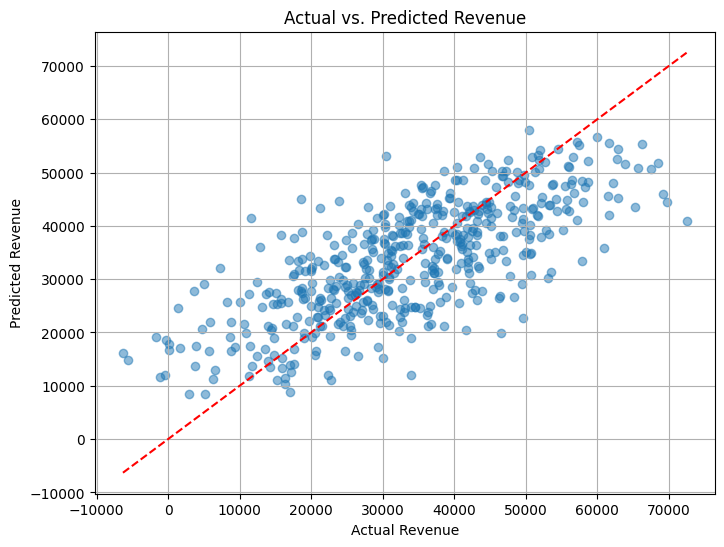

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual revenue vs. predicted revenue
plt.figure(figsize=(8, 6))
plt.scatter(Y, predictions, alpha=0.5)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs. Predicted Revenue")
plt.grid(True)

# Add a diagonal line representing perfect prediction
min_val = min(Y.min(), predictions.min())
max_val = max(Y.max(), predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.show()

# **Multicollinearity**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Condition Number

# Steps: 1) Make all variables to unit length
norm_x = X.values
for i, name in enumerate(X):
    if name == "const":
        continue
    norm_x[:,i] = X[name]/np.linalg.norm(X[name])
norm_xtx = np.dot(norm_x.T,norm_x)

# 2) take the square root of the ratio of the biggest to the smallest eigen values.
eigs = np.linalg.eigvals(norm_xtx)
condition_number = np.sqrt(eigs.max() / eigs.min())
print(condition_number)

74.22116352951552


In [ ]:
# VIF

# 1) Create a DataFrame to store VIF values

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(X.shape[1])]

print(vif_data)

         feature        VIF
0          const  16.342354
1   search_spend   1.005247
2  display_spend   1.002674
3    video_spend   1.004466
4    day_of_week   2.480681
5     is_weekend   2.479319


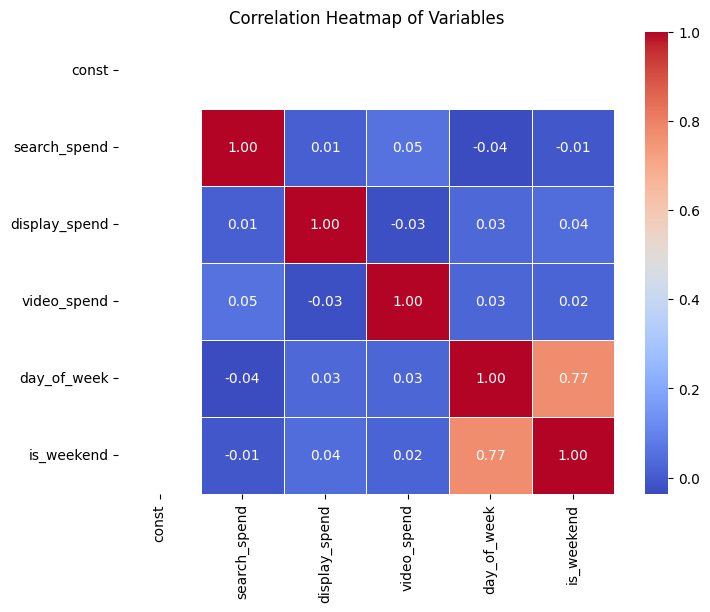

In [ ]:
import seaborn as sns

correlation_matrix = X.corr()

# Create the heatmap
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(correlation_matrix,
            annot=True,     # Display correlation values on the heatmap
            cmap='coolwarm', # Choose a colormap (e.g., 'coolwarm', 'RdBu_r', 'viridis')
            fmt=".2f",      # Format annotation values to two decimal places
            linewidths=.5)  # Add lines between cells

plt.title('Correlation Heatmap of Variables')
plt.show()

## **Practice exercises using OpenIntro**

In [ ]:
import statsmodels.api as sm

def backward_selection(X, Y, significance_level=0.05):
    """
    Performs backward selection for linear regression.

    Args:
        X (pd.DataFrame): DataFrame of independent variables (including the constant).
        Y (pd.Series): Series of the dependent variable.
        significance_level (float): The significance level to use for removing variables.

    Returns:
        sm.regression.linear_model.RegressionResults: The results of the final OLS model.
    """
    features = list(X.columns)
    while len(features) > 1:  # Keep iterating as long as there's more than just the constant
        model = sm.OLS(Y, X[features]).fit()
        p_values = model.pvalues.drop('const')  # Exclude the p-value for the constant

        # Find the variable with the highest p-value
        highest_p_value = p_values.max()
        highest_p_value_feature = p_values.idxmax()

        if highest_p_value > significance_level:
            print(f"Removing '{highest_p_value_feature}' with p-value {highest_p_value:.4f}")
            features.remove(highest_p_value_feature)
        else:
            break  # All remaining variables are significant

    final_model = sm.OLS(Y, X[features]).fit()
    return final_model

# Assuming X and Y are already defined and X includes the constant
# X = sm.add_constant(df.drop(columns=['revenue']))
# Y = df['revenue']

# Perform backward selection
final_results = backward_selection(X, Y)

# Print the summary of the final model
print("\nFinal Model Summary after Backward Selection:")
print(final_results.summary())

Removing 'day_of_week' with p-value 0.9048
Removing 'is_weekend' with p-value 0.0862

Final Model Summary after Backward Selection:
                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     187.2
Date:                Sun, 22 Jun 2025   Prob (F-statistic):           3.61e-81
Time:                        11:54:18   Log-Likelihood:                -5318.4
No. Observations:                 500   AIC:                         1.064e+04
Df Residuals:                     496   BIC:                         1.066e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.9

In [ ]:
import statsmodels.api as sm

def forward_selection(X, Y, significance_level=0.05):
    """
    Performs forward selection for linear regression.

    Args:
        X (pd.DataFrame): DataFrame of independent variables (including the constant).
        Y (pd.Series): Series of the dependent variable.
        significance_level (float): The significance level to use for adding variables.

    Returns:
        sm.regression.linear_model.RegressionResults: The results of the final OLS model.
    """
    initial_features = ['const'] # Start with the constant
    selected_features = list(initial_features)
    remaining_features = list(X.columns.drop('const'))

    while remaining_features:
        best_new_feature = None
        best_p_value = significance_level + 1 # Initialize with a value greater than significance_level

        for feature in remaining_features:
            current_features = selected_features + [feature]
            model = sm.OLS(Y, X[current_features]).fit()
            p_value = model.pvalues[feature]

            if p_value < significance_level and p_value < best_p_value:
                best_p_value = p_value
                best_new_feature = feature

        if best_new_feature:
            selected_features.append(best_new_feature)
            remaining_features.remove(best_new_feature)
            print(f"Adding '{best_new_feature}' with p-value {best_p_value:.4f}")
        else:
            break # No significant feature to add

    final_model = sm.OLS(Y, X[selected_features]).fit()
    return final_model

# Assuming X and Y are already defined and X includes the constant
# X = sm.add_constant(df.drop(columns=['revenue']))
# Y = df['revenue']

# Perform forward selection
final_results_forward = forward_selection(X, Y)

# Print the summary of the final model
print("\nFinal Model Summary after Forward Selection:")
print(final_results_forward.summary())

Adding 'search_spend' with p-value 0.0000
Adding 'video_spend' with p-value 0.0000
Adding 'display_spend' with p-value 0.0000

Final Model Summary after Forward Selection:
                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     187.2
Date:                Sun, 22 Jun 2025   Prob (F-statistic):           3.61e-81
Time:                        11:55:35   Log-Likelihood:                -5318.4
No. Observations:                 500   AIC:                         1.064e+04
Df Residuals:                     496   BIC:                         1.066e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err   

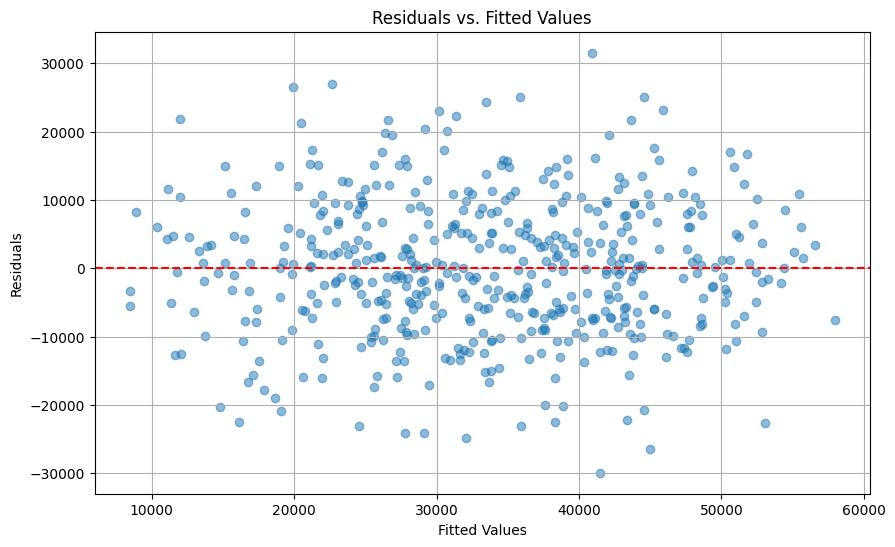

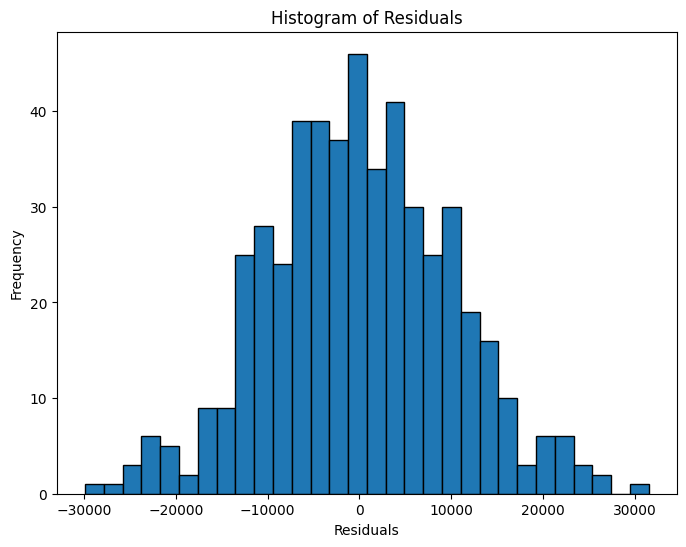

<Figure size 800x600 with 0 Axes>

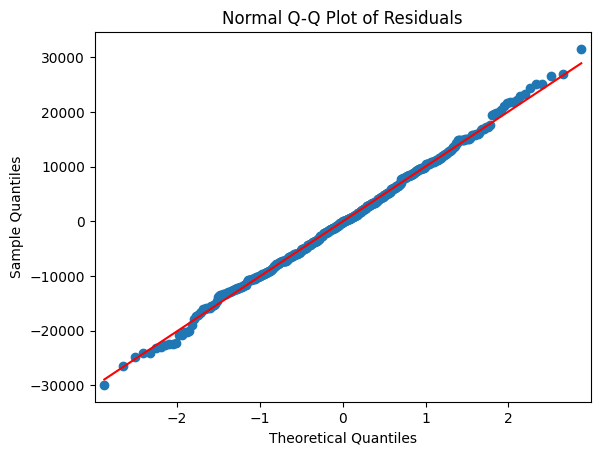


Shapiro-Wilk Test Statistic: 0.9979
Shapiro-Wilk Test P-value: 0.7977
Result: Residuals appear to be normally distributed (fail to reject H0)


In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

# Assuming 'results' is your fitted statsmodels OLS model object

# 1. Residuals vs. Fitted Values Plot
# This plot helps check for homoscedasticity (constant variance of residuals)
# and linearity. A random scatter of points around zero suggests these assumptions are met.
plt.figure(figsize=(10, 6))
plt.scatter(results.fittedvalues, results.resid, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--') # Add a horizontal line at y=0
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.grid(True)
plt.show()

# 2. Histogram of Residuals
# This plot gives a general idea of the distribution of residuals.
plt.figure(figsize=(8, 6))
plt.hist(results.resid, bins=30, edgecolor='black')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

# 3. Normal Q-Q Plot (Quantile-Quantile Plot)
# This is a more formal way to check for normality of residuals.
# If the points lie close to the diagonal line, it suggests the residuals are normally distributed.
plt.figure(figsize=(8, 6))
sm.qqplot(results.resid, line='s') # 's' draws a standard normal line
plt.title("Normal Q-Q Plot of Residuals")
plt.show()

# 4. Shapiro-Wilk Test for Normality (Statistical Test)
# This is a statistical test for normality. The null hypothesis is that the data is normally distributed.
# A low p-value (typically < 0.05) leads to rejection of the null hypothesis,
# suggesting the residuals are NOT normally distributed.
shapiro_test = stats.shapiro(results.resid)
print(f"\nShapiro-Wilk Test Statistic: {shapiro_test.statistic:.4f}")
print(f"Shapiro-Wilk Test P-value: {shapiro_test.pvalue:.4f}")

if shapiro_test.pvalue < 0.05:
    print("Result: Residuals do not appear to be normally distributed (reject H0)")
else:
    print("Result: Residuals appear to be normally distributed (fail to reject H0)")

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Assuming 'results' is your fitted statsmodels OLS model object
# and 'X' is your DataFrame of independent variables (including the constant)

# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(results.resid, results.model.exog)

# The test returns:
# 1. LM statistic
# 2. LM p-value
# 3. F-statistic
# 4. F p-value

lm_statistic, lm_p_value, f_statistic, f_p_value = bp_test

print(f"Breusch-Pagan Test:")
print(f"  LM Statistic: {lm_statistic:.4f}")
print(f"  LM p-value: {lm_p_value:.4f}")
print(f"  F-statistic: {f_statistic:.4f}")
print(f"  F p-value: {f_p_value:.4f}")

# Interpretation of the p-value:
# The null hypothesis (H0) of the Breusch-Pagan test is that the errors are homoscedastic
#  (constant variance).
# A low p-value (typically < 0.05) leads to rejection of the null hypothesis,
# suggesting that the errors are heteroscedastic (non-constant variance).

if lm_p_value < 0.05:
    print("Result: Residuals appear to be heteroscedastic (reject H0)")
else:
    print("Result: Residuals appear to be homoscedastic (fail to reject H0)")

Breusch-Pagan Test:
  LM Statistic: 1.9992
  LM p-value: 0.8492
  F-statistic: 0.3966
  F p-value: 0.8512
Result: Residuals appear to be homoscedastic (fail to reject H0)


In [ ]:
# Assuming 'results' is your fitted statsmodels OLS model object
print(results.summary())

# Look for the 'Durbin-Watson' statistic in the summary output

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     113.1
Date:                Sun, 22 Jun 2025   Prob (F-statistic):           1.56e-79
Time:                        12:07:02   Log-Likelihood:                -5316.9
No. Observations:                 500   AIC:                         1.065e+04
Df Residuals:                     494   BIC:                         1.067e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -243.1843   1827.018     -0.133

# **Introduction to logistic regression**


resume.csv is saved in Downloads folder

In [ ]:
df = pd.read_csv("resume.csv")
df.columns

Index(['job_ad_id', 'job_city', 'job_industry', 'job_type',
       'job_fed_contractor', 'job_equal_opp_employer', 'job_ownership',
       'job_req_any', 'job_req_communication', 'job_req_education',
       'job_req_min_experience', 'job_req_computer', 'job_req_organization',
       'job_req_school', 'received_callback', 'firstname', 'race', 'gender',
       'years_college', 'college_degree', 'honors', 'worked_during_school',
       'years_experience', 'computer_skills', 'special_skills', 'volunteer',
       'military', 'employment_holes', 'has_email_address', 'resume_quality'],
      dtype='object')

In [ ]:
df.received_callback.value_counts()

,count
received_callback,
0,4478
1,392


In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Assuming your dataframe 'df' is already loaded with your data
# and contains the features and the target variable.
# For logistic regression, your target variable should be binary (0 or 1).

keep_columns = ['job_city', 'college_degree','years_experience','honors', 'military','has_email_address',
                'race','gender']

X = df[keep_columns] # Select your independent variables
y = df['received_callback'] # Select your binary dependent variable

# one hot encoding for object variables
# 1. Identify object columns
object_columns = X.select_dtypes(include=['object']).columns
print(f"\nIdentified object columns: {list(object_columns)}")

# 2. Perform one-hot encoding on the object columns
# drop_first=True is often used to avoid multicollinearity (dummy variable trap)
df_encoded = pd.get_dummies(X, columns = object_columns, drop_first=True, dtype=int)

df_encoded.head()



Identified object columns: ['job_city', 'race', 'gender']


,college_degree,years_experience,honors,military,has_email_address,job_city_Chicago,race_white,gender_m
0,1,6,0,0,0,1,1,0
1,0,6,0,1,1,1,1,0
2,1,6,0,0,0,1,0,0
3,0,6,0,0,1,1,0,0
4,0,22,0,0,1,1,1,0


In [ ]:
df_encoded.dtypes

,0
college_degree,int64
years_experience,int64
honors,int64
military,int64
has_email_address,int64
job_city_Chicago,int64
race_white,int64
gender_m,int64


In [ ]:
# Add a constant (intercept) to the independent variables
# This is crucial for statsmodels to include the intercept in the model
df_encoded = sm.add_constant(df_encoded)

# Create the Logit model
# Note: For logistic regression, statsmodels uses sm.Logit (not sm.OLS)
logit_model = sm.Logit(y, df_encoded)

# Fit the model to the data
results = logit_model.fit()

# Print the summary of the regression results
print(results.summary())


# You can access various results attributes, similar to OLS
print("\nCoefficients:", results.params)
print("P-values:", results.pvalues)

# Predict probabilities
predictions_prob = results.predict(df_encoded)
print("\nPredicted Probabilities:\n", predictions_prob.head())

# Predict class labels (0 or 1) based on a threshold (e.g., 0.5)
predictions_class = (predictions_prob > 0.5).astype(int)
print("\nPredicted Class Labels (threshold 0.5):\n", predictions_class.head())

Optimization terminated successfully.
         Current function value: 0.273023
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:      received_callback   No. Observations:                 4870
Model:                          Logit   Df Residuals:                     4861
Method:                           MLE   Df Model:                            8
Date:                Sun, 22 Jun 2025   Pseudo R-squ.:                 0.02482
Time:                        15:13:54   Log-Likelihood:                -1329.6
converged:                       True   LL-Null:                       -1363.5
Covariance Type:            nonrobust   LLR p-value:                 1.425e-11
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.6632      0.182    -14.636      0.000      -3.020      -2.307
college_

In [ ]:
percentiles = np.linspace(0, 1.0, num=11)

print(percentiles)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [ ]:
predictions_prob.quantile(percentiles)

,0
0.0,0.028909
0.1,0.045499
0.2,0.054703
0.3,0.059984
0.4,0.068502
0.5,0.072741
0.6,0.082450
0.7,0.088529
0.8,0.102705
0.9,0.118446


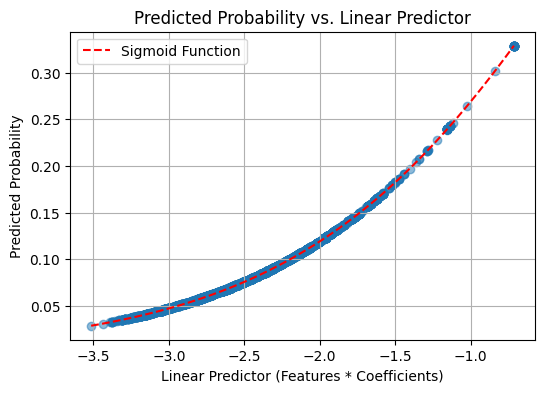

In [ ]:
import matplotlib.pyplot as plt
# import numpy as np

# Calculate the linear combination of features and coefficients (log-odds)
# This is essentially the output of the linear part of the logistic regression model before the sigmoid function
# It's calculated as X * coefficients (dot product)
linear_predictor = np.dot(df_encoded, results.params)

# Get the predicted probabilities from the model
predicted_probabilities = results.predict(df_encoded)

# Create the scatter plot
plt.figure(figsize=(6, 4))

# Scatter plot of predicted probabilities vs. the linear predictor
plt.scatter(linear_predictor, predicted_probabilities, alpha=0.5)

# Add labels and title
plt.xlabel("Linear Predictor (Features * Coefficients)")
plt.ylabel("Predicted Probability")
plt.title("Predicted Probability vs. Linear Predictor")
plt.grid(True)

# Optionally, add a plot of the sigmoid function to show the relationship
# The sigmoid function is P(y=1) = 1 / (1 + exp(-linear_predictor))
x_sigmoid = np.linspace(min(linear_predictor), max(linear_predictor), 100)
y_sigmoid = 1 / (1 + np.exp(-x_sigmoid))
plt.plot(x_sigmoid, y_sigmoid, color='red', linestyle='--', label='Sigmoid Function')
plt.legend()

plt.show()

In [ ]:
import statsmodels.api as sm
import pandas as pd

def backward_selection_aic_logit(X, Y):
    """
    Performs backward selection for logistic regression using AIC.

    Args:
        X (pd.DataFrame): DataFrame of independent variables (including the constant).
        Y (pd.Series): Series of the binary dependent variable (0 or 1).

    Returns:
        sm.discrete.discrete_model.BinaryLogisticRegressionResults: The results of the final Logit model.
        list: The list of selected features.
    """
    features = list(X.columns)
    selected_features = list(features)
    best_aic = float('inf') # Initialize best AIC to infinity

    while len(selected_features) > 1: # Keep iterating as long as there's more than just the constant
        # Use sm.Logit for logistic regression
        model = sm.Logit(Y, X[selected_features]).fit(disp=0) # disp=0 to suppress convergence output
        current_aic = model.aic
        print(f"Current model AIC with features {selected_features}: {current_aic:.4f}")

        # If the current model's AIC is better than the best AIC found so far
        if current_aic < best_aic:
            best_aic = current_aic
            best_model = model # Keep track of the best model found so far

        # Find the variable to remove that results in the lowest AIC in the next step
        aic_after_removal = {}
        features_to_consider_removal = [f for f in selected_features if f != 'const'] # Don't remove the constant

        for feature_to_remove in features_to_consider_removal:
            temp_features = [f for f in selected_features if f != feature_to_remove]
            if len(temp_features) > 0: # Ensure there's at least the constant left
                 # Use sm.Logit for logistic regression
                 temp_model = sm.Logit(Y, X[temp_features]).fit(disp=0) # disp=0 to suppress convergence output
                 aic_after_removal[feature_to_remove] = temp_model.aic

        if not aic_after_removal: # No features to remove other than the constant
            break

        # Find the feature whose removal results in the lowest AIC
        feature_to_remove = min(aic_after_removal, key=aic_after_removal.get)
        min_aic_after_removal = aic_after_removal[feature_to_remove]

        # If removing the feature improves the AIC, remove it
        # In AIC-based selection, we remove if the AIC *decreases* after removal.
        if min_aic_after_removal < current_aic:
            selected_features.remove(feature_to_remove)
            print(f"Removing '{feature_to_remove}' resulting in AIC {min_aic_after_removal:.4f}")
        else:
            print(f"No feature removal improves AIC. Stopping backward selection.")
            break # No improvement in AIC by removing any feature

    # Fit the final model with the selected features
    final_model = sm.Logit(y, df_encoded[selected_features]).fit()
    return final_model, selected_features

# Assuming X and Y are already defined from your logistic regression setup
# X should include the constant: X = sm.add_constant(your_features_dataframe)
# Y should be your binary target variable (0 or 1)

# Example usage with your data (replace with your actual X and Y)
# X = sm.add_constant(df_encoded) # Assuming df_encoded is your features df after one-hot encoding
# Y = df['received_callback'] # Assuming 'received_callback' is your binary target

# Perform backward selection using AIC for Logistic Regression
final_results_aic_logit, selected_features_aic_logit = backward_selection_aic_logit(df_encoded, y)

# Print the summary of the final model
print("\nFinal Logistic Regression Model Summary after Backward Selection (AIC):")
print(final_results_aic_logit.summary())
print("\nSelected Features by AIC Backward Selection:", selected_features_aic_logit)
dropped = df_encoded.columns.difference(selected_features_aic_logit)
print("\nDropped Features by AIC Backward Selection:", dropped)

Current model AIC with features ['const', 'college_degree', 'years_experience', 'honors', 'military', 'has_email_address', 'job_city_Chicago', 'race_white', 'gender_m']: 2677.2468
Removing 'college_degree' resulting in AIC 2675.5478
Current model AIC with features ['const', 'years_experience', 'honors', 'military', 'has_email_address', 'job_city_Chicago', 'race_white', 'gender_m']: 2675.5478
No feature removal improves AIC. Stopping backward selection.
Optimization terminated successfully.
         Current function value: 0.273054
         Iterations 7

Final Logistic Regression Model Summary after Backward Selection (AIC):
                           Logit Regression Results                           
Dep. Variable:      received_callback   No. Observations:                 4870
Model:                          Logit   Df Residuals:                     4862
Method:                           MLE   Df Model:                            7
Date:                Sun, 22 Jun 2025   Pseudo R-squ

In [ ]:
# interpretation of coeff for race_white

odds_ratio = np.exp(0.4429)
print(f"The odds ratio for race_white is: {odds_ratio}")

# convert to probability
# p / 1 - p = 1.5572 --> 1-p/p = 1/1.5527 --> 1/p = (1/1.5527) + 1 --> p = 1 /((1/1.5527) + 1)
p = 1 / ((1/1.5527) + 1)
print(f"The probability for race_white is: {p}")

The odds ratio for race_white is: 1.5572166048949474
The probability for race_white is: 0.6082579229835077


**The max value is 0.328. In this scenario how should I go about deciding on the threshold for classification problems?**

In [ ]:
from sklearn.metrics import roc_curve

# Use ROC Curve and Choose Threshold by Youden’s J

predicted_probabilities = results.predict(df_encoded)

fpr, tpr, thresholds = roc_curve(y, predicted_probabilities)
optimal_idx = (tpr - fpr).argmax()
optimal_threshold = thresholds[optimal_idx]
print(f"The optimal_threshold using Youden’s J is: {optimal_threshold}")


The optimal_threshold using Youden’s J is: 0.09033041497094232
